In [1]:
import pandas as pd
import re
from IPython.display import display
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch
import numpy as np

In [2]:
file_path = '../data/data_visualization/RampFinalAction_entries_MNOP.csv'

df = pd.read_csv(file_path)

In [3]:
# regex pattern to match the required fields
pattern = re.compile(
    r'(?P<Type>\w+)\s+(?P<Destination>\w+)\s+(?P<Bag_pieces>\d+)\s+(?P<Bag_weight>[\d\.]+\sKG)'
)

# function to extract and categorize baggage data by Type
def extract_and_categorize_baggage_data(text):
    matches = pattern.finditer(text)
    result = {}
    for match in matches:
        data = match.groupdict()
        type_key = data['Type'].lower()  # e.g., loadtable, cki, sum
        result[f"{type_key}_destination"] = data['Destination']
        result[f"{type_key}_bag_pieces"] = int(data['Bag_pieces'])
        result[f"{type_key}_bag_weight"] = data['Bag_weight']
    return result

# apply the function to the appropriate column (assuming 'entry_details')
extracted_data = df['entry_details'].apply(extract_and_categorize_baggage_data)

# convert the result to a DataFrame
baggage_data_df = pd.DataFrame(extracted_data.tolist())

# include the additional columns
df['timestamp'] = df['creation_time']
df['creation_time'] = pd.to_datetime(df['creation_time']).dt.to_period('M').astype(str)
df['creation_time'] = df['creation_time'].str.replace('-04', '-05')
df['combined'] = df['creation_time'] + '_' + df['airline_code'] + '_' + df['flight_number'].astype(str) + '_' + df['flight_date'].astype(str)

# add the combined column and timestamp to the baggage_data_df
baggage_data_df['combined'] = df['combined']
baggage_data_df['timestamp'] = df['timestamp']

# DataFrame
display(baggage_data_df)


# save the DataFrame to a CSV file
baggage_data_df.to_csv('extracted_baggage_data_MNOP.csv', index=False)


,cki_destination,cki_bag_pieces,cki_bag_weight,loadtable_destination,loadtable_bag_pieces,loadtable_bag_weight,combined,timestamp
0,NaN,NaN,NaN,NaN,NaN,NaN,2024-05_MN_1680.0_30.0,2024-04-30 04:46:19
1,NaN,NaN,NaN,NaN,NaN,NaN,2024-05_MN_1680.0_30.0,2024-04-30 04:46:17
2,NaN,NaN,NaN,NaN,NaN,NaN,2024-05_MN_1680.0_30.0,2024-04-30 04:46:17
3,NaN,NaN,NaN,NaN,NaN,NaN,2024-05_MN_1680.0_30.0,2024-04-30 04:46:19
4,NaN,NaN,NaN,NaN,NaN,NaN,2024-05_MN_1602.0_30.0,2024-04-30 04:54:12
...,...,...,...,...,...,...,...,...
5607,NaN,NaN,NaN,NaN,NaN,NaN,2024-05_MN_1392.0_7.0,2024-05-07 08:58:12
5608,NaN,NaN,NaN,NaN,NaN,NaN,2024-05_MN_1392.0_7.0,2024-05-07 08:58:09
5609,HAM,93.0,1209.00 KG,HAM,85.0,1105.00 KG,2024-05_MN_1392.0_7.0,2024-05-07 08:58:09
5610,NaN,NaN,NaN,NaN,NaN,NaN,2024-05_MN_1392.0_7.0,2024-05-07 08:58:09


In [8]:
file_path = '../data/data_visualization/extracted_baggage_data_MNOP.csv'  
df = pd.read_csv(file_path)

# filter out rows where any CKI-related columns are missing
filtered_df = df.dropna(subset=['cki_destination', 'cki_bag_pieces', 'cki_bag_weight'])

# filtered DataFrame
display(filtered_df)

# save the filtered DataFrame to a new CSV file
filtered_df.to_csv('filtered_cki_baggage_data_MNOP.csv', index=False)

,cki_destination,cki_bag_pieces,cki_bag_weight,loadtable_destination,loadtable_bag_pieces,loadtable_bag_weight,combined,timestamp
10,FCO,79.0,1027.00 KG,NaN,NaN,NaN,2024-05_MN_1402.0_30.0,2024-04-30 04:56:36
17,NAP,125.0,1625.00 KG,NAP,123.0,1599.00 KG,2024-05_MN_1450.0_30.0,2024-04-30 04:57:06
22,MAD,77.0,1001.00 KG,MAD,79.0,1027.00 KG,2024-05_MN_1592.0_30.0,2024-04-30 04:58:29
27,LHR,88.0,1144.00 KG,LHR,86.0,1118.00 KG,2024-05_MN_1152.0_30.0,2024-04-30 05:08:00
30,FCO,79.0,1027.00 KG,NaN,NaN,NaN,2024-05_MN_1402.0_30.0,2024-04-30 05:10:57
...,...,...,...,...,...,...,...,...
5588,CDG,133.0,1729.00 KG,CDG,117.0,1521.00 KG,2024-05_MN_1524.0_7.0,2024-05-07 08:16:26
5591,LHR,104.0,1352.00 KG,LHR,105.0,1365.00 KG,2024-05_MN_1158.0_7.0,2024-05-07 08:31:55
5593,CDG,133.0,1729.00 KG,CDG,127.0,1651.00 KG,2024-05_MN_1524.0_7.0,2024-05-07 08:36:59
5603,AMS,111.0,1443.00 KG,AMS,109.0,1417.00 KG,2024-05_MN_1604.0_7.0,2024-05-07 08:48:52


In [12]:
# load the CSV file with the baggage data
file_path = '../data/data_visualization/filtered_cki_baggage_data_MNOP.csv'  
df = pd.read_csv(file_path)

# convert 'timestamp' to datetime if it's not already
df['timestamp'] = pd.to_datetime(df['timestamp'])

# sort the data by 'combined' and 'timestamp' (most recent first)
df = df.sort_values(by=['combined', 'timestamp'], ascending=[True, False])

# drop duplicates keeping the first (most recent) entry for each 'combined' value
df = df.drop_duplicates(subset='combined', keep='first')

display(df)

df.to_csv('latest_entries_baggage_data_MNOP.csv', index=False)


,cki_destination,cki_bag_pieces,cki_bag_weight,loadtable_destination,loadtable_bag_pieces,loadtable_bag_weight,combined,timestamp
158,MAN,231.0,3465.00 KG,MAN,229.0,3435.00 KG,2024-05_MN_1030.0_1.0,2024-05-01 21:47:16
372,MAN,195.0,2925.00 KG,MAN,202.0,10301030.00 KG,2024-05_MN_1030.0_3.0,2024-05-03 21:51:51
603,MAN,226.0,3390.00 KG,MAN,224.0,3360.00 KG,2024-05_MN_1030.0_5.0,2024-05-05 21:38:23
244,MAN,161.0,2415.00 KG,MAN,168.0,2520.00 KG,2024-05_MN_1034.0_2.0,2024-05-02 21:15:59
67,MAN,207.0,3105.00 KG,MAN,210.0,3150.00 KG,2024-05_MN_1034.0_30.0,2024-04-30 21:20:06
...,...,...,...,...,...,...,...,...
672,LPA,154.0,2002.00 KG,LPA,155.0,2015.00 KG,2024-05_MN_1782.0_6.0,2024-05-06 13:42:03
446,DLM,168.0,2184.00 KG,DLM,167.0,2171.00 KG,2024-05_MN_1790.0_4.0,2024-05-04 12:12:24
233,ADB,150.0,1950.00 KG,ADB,145.0,1885.00 KG,2024-05_MN_1798.0_2.0,2024-05-02 17:07:58
462,ADB,154.0,2002.00 KG,ADB,151.0,1963.00 KG,2024-05_MN_1798.0_4.0,2024-05-04 14:09:29


In [13]:
# load the data
file_path = '/filtered_loadtable_baggage_data_MNOP_new.csv'
df = pd.read_csv(file_path)

# convert weight strings to numerical values (assuming weights are in 'XX.XX KG' format)
df['loadtable_bag_weight_kg'] = df['loadtable_bag_weight'].str.extract('(\d+.\d+)').astype(float)
df['cki_bag_weight_kg'] = df['cki_bag_weight'].str.extract('(\d+.\d+)').astype(float)

# remove entries with false weight values (greater than 10,000 kg)
df = df[(df['loadtable_bag_weight_kg'] <= 10000.0) & (df['cki_bag_weight_kg'] <= 10000.0)]

# calculate differences
df['diff_bag_pieces'] = df['cki_bag_pieces'] - df['loadtable_bag_pieces']
df['diff_bag_weight'] = df['cki_bag_weight_kg'] - df['loadtable_bag_weight_kg']

# calculate total and average differences
total_diff_weight = df['diff_bag_weight'].mean()
avg_diff_pieces = df['diff_bag_pieces'].mean()

# plotting the differences in separate charts
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))

# bar chart for average difference in bag pieces
ax1.bar('Average Difference in Bag Pieces', avg_diff_pieces, color='#AAD4FF')
ax1.set_title('Average Difference in Bag Pieces', fontsize = 14, fontweight = "bold")
ax1.set_ylabel('Average Difference')
ax1.text(0, avg_diff_pieces, f"{avg_diff_pieces:.2f}", ha='center', va='bottom', fontsize = 12)

# bar chart for total difference in bag weight
ax2.bar('Total Difference in Bag Weight (kg)', total_diff_weight, color='#1a497e')
ax2.set_title('Total Difference in Bag Weight', fontsize = 14, fontweight = "bold")
ax2.set_ylabel('Total Difference in Weight (kg)')
ax2.text(0, total_diff_weight, f"{total_diff_weight:.2f}", ha='center', va='bottom', fontsize = 12)

plt.tight_layout()

plt.savefig('./graphics/bag_average.svg')

plt.show()



<>:6: SyntaxWarning: invalid escape sequence '\d'
<>:7: SyntaxWarning: invalid escape sequence '\d'
<>:6: SyntaxWarning: invalid escape sequence '\d'
<>:7: SyntaxWarning: invalid escape sequence '\d'
/var/folders/vm/vj250x0s5q9bj_4nnx_z8mcc0000gn/T/ipykernel_97183/3519167142.py:6: SyntaxWarning: invalid escape sequence '\d'
  df['loadtable_bag_weight_kg'] = df['loadtable_bag_weight'].str.extract('(\d+.\d+)').astype(float)
/var/folders/vm/vj250x0s5q9bj_4nnx_z8mcc0000gn/T/ipykernel_97183/3519167142.py:7: SyntaxWarning: invalid escape sequence '\d'
  df['cki_bag_weight_kg'] = df['cki_bag_weight'].str.extract('(\d+.\d+)').astype(float)
/var/folders/vm/vj250x0s5q9bj_4nnx_z8mcc0000gn/T/ipykernel_97183/3519167142.py:6: SyntaxWarning: invalid escape sequence '\d'
  df['loadtable_bag_weight_kg'] = df['loadtable_bag_weight'].str.extract('(\d+.\d+)').astype(float)
/var/folders/vm/vj250x0s5q9bj_4nnx_z8mcc0000gn/T/ipykernel_97183/3519167142.py:7: SyntaxWarning: invalid escape sequence '\d'
  df['ck

FileNotFoundError: [Errno 2] No such file or directory: '/filtered_loadtable_baggage_data_MNOP_new.csv'

<>:5: SyntaxWarning: invalid escape sequence '\d'
<>:6: SyntaxWarning: invalid escape sequence '\d'
<>:5: SyntaxWarning: invalid escape sequence '\d'
<>:6: SyntaxWarning: invalid escape sequence '\d'
/var/folders/wp/ym17w5jd1v7bd3lfnf9_z10c0000gn/T/ipykernel_84170/1180869595.py:5: SyntaxWarning: invalid escape sequence '\d'
  df['loadtable_bag_weight_kg'] = df['loadtable_bag_weight'].str.extract('(\d+.\d+)').astype(float)
/var/folders/wp/ym17w5jd1v7bd3lfnf9_z10c0000gn/T/ipykernel_84170/1180869595.py:6: SyntaxWarning: invalid escape sequence '\d'
  df['cki_bag_weight_kg'] = df['cki_bag_weight'].str.extract('(\d+.\d+)').astype(float)


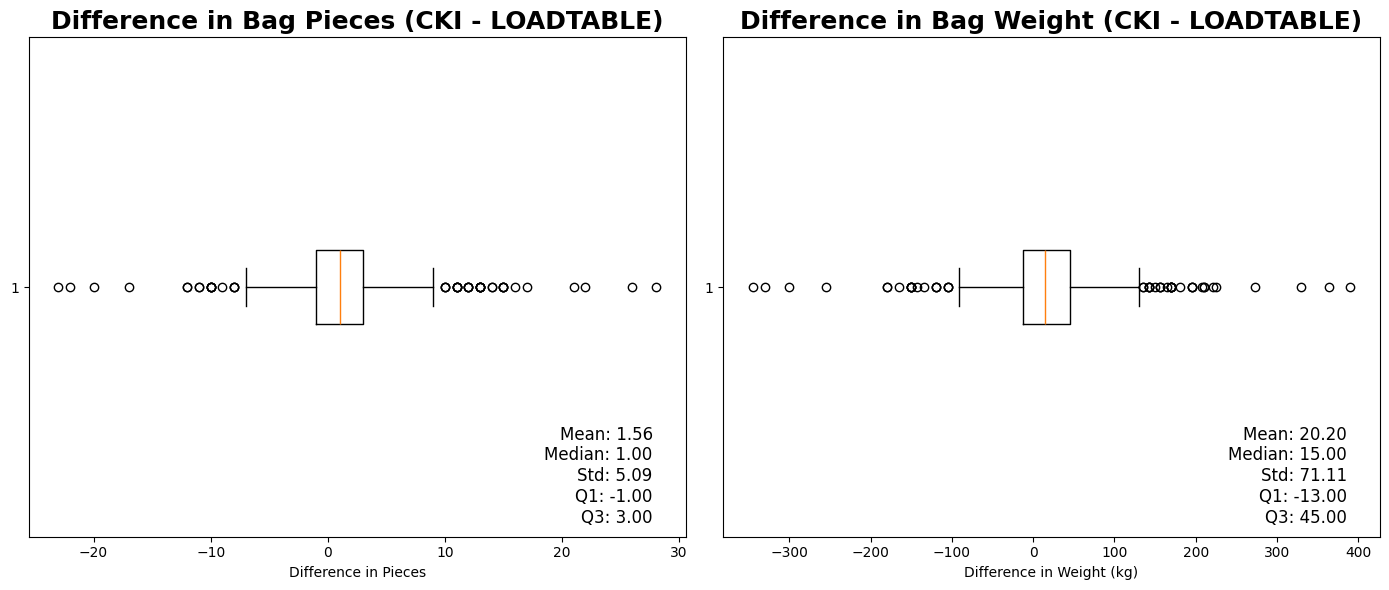

In [ ]:
file_path = '../data_engineering/niks_data_mata/RampFinalAction/filtered_loadtable_baggage_data_MNOP_new.csv'
df = pd.read_csv(file_path)

# Gewicht-Strings in numerische Werte umwandeln (angenommen, die Gewichte sind im 'XX.XX KG'-Format)
df['loadtable_bag_weight_kg'] = df['loadtable_bag_weight'].str.extract('(\d+.\d+)').astype(float)
df['cki_bag_weight_kg'] = df['cki_bag_weight'].str.extract('(\d+.\d+)').astype(float)

# Unterschiede berechnen
df['diff_bag_pieces'] = df['cki_bag_pieces'] - df['loadtable_bag_pieces']
df['diff_bag_weight'] = df['cki_bag_weight_kg'] - df['loadtable_bag_weight_kg']

# Strengere Filterkriterien für Gewichtsunterschiede anwenden
max_reasonable_difference = 1000
df_filtered = df[(df['diff_bag_pieces'].abs() <= 30) &  # Aktualisierung auf eine angemessenere Zahl für Stückunterschiede, falls erforderlich
                 (df['diff_bag_weight'].abs() <= max_reasonable_difference)]

# Statistiken berechnen
bag_pieces_stats = df_filtered['diff_bag_pieces'].describe()
bag_weight_stats = df_filtered['diff_bag_weight'].describe()

# Unterschiede mit Boxplots nach dem Filtern extremer Werte plotten
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Boxplot für den Unterschied in der Anzahl der Gepäckstücke
ax[0].boxplot(df_filtered['diff_bag_pieces'].dropna(), vert=False)
ax[0].set_title('Difference in Bag Pieces (CKI - LOADTABLE)', fontsize=18, fontweight="bold")
ax[0].set_xlabel('Difference in Pieces')
ax[0].text(0.95, 0.02, f'Mean: {bag_pieces_stats["mean"]:.2f}\n'
                       f'Median: {bag_pieces_stats["50%"]:.2f}\n'
                       f'Std: {bag_pieces_stats["std"]:.2f}\n'
                       f'Q1: {bag_pieces_stats["25%"]:.2f}\n'
                       f'Q3: {bag_pieces_stats["75%"]:.2f}', 
           transform=ax[0].transAxes, fontsize=12,
           verticalalignment='bottom', horizontalalignment='right')

# Boxplot für den Unterschied im Gepäckgewicht
ax[1].boxplot(df_filtered['diff_bag_weight'].dropna(), vert=False)
ax[1].set_title('Difference in Bag Weight (CKI - LOADTABLE)', fontsize=18, fontweight="bold")
ax[1].set_xlabel('Difference in Weight (kg)')

plt.tight_layout()
plt.savefig('./graphics/bag_boxplots.svg')
plt.show()



In [5]:
# load the data
file_path = '../data_engineering/niks_data_mata/RampFinalAction/filtered_loadtable_baggage_data_MNOP_new.csv'
df = pd.read_csv(file_path)

# convert weight strings to numerical values
df['loadtable_bag_weight_kg'] = df['loadtable_bag_weight'].str.extract('(\d+.\d+)').astype(float)
df['cki_bag_weight_kg'] = df['cki_bag_weight'].str.extract('(\d+.\d+)').astype(float)

# calculate the differences
df['Difference in Pieces'] = df['cki_bag_pieces'] - df['loadtable_bag_pieces']
df['Difference in Weight (kg)'] = df['cki_bag_weight_kg'] - df['loadtable_bag_weight_kg']

# apply filtering to remove extreme outliers
max_reasonable_diff_weight = 1000  # max reasonable weight difference in kg
max_reasonable_diff_pieces = 30    # max reasonable pieces difference

# filtering out extreme values
df_filtered = df[(df['Difference in Pieces'].abs() <= max_reasonable_diff_pieces) &
                 (df['Difference in Weight (kg)'].abs() <= max_reasonable_diff_weight)]

# plotting using seaborn for more detailed distribution analysis
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# violin plot for the difference in bag pieces
sns.violinplot(data=df_filtered, y='Difference in Pieces', ax=ax[0], inner='point', scale='width', palette=['#AAD4FF'])
ax[0].set_title('Difference in Bag Pieces (CKI - LOADTABLE)', fontsize=14, fontweight = "bold")

# violin plot for the difference in bag weight
sns.violinplot(data=df_filtered, y='Difference in Weight (kg)', ax=ax[1], inner='point', scale='width', palette=['#1a497e'])
ax[1].set_title('Difference in Bag Weight (CKI - LOADTABLE)', fontsize=14, fontweight = "bold")

plt.tight_layout()

plt.savefig('./graphics/bag_violine.svg')

plt.show()



<>:6: SyntaxWarning: invalid escape sequence '\d'
<>:7: SyntaxWarning: invalid escape sequence '\d'
<>:6: SyntaxWarning: invalid escape sequence '\d'
<>:7: SyntaxWarning: invalid escape sequence '\d'
/var/folders/vm/vj250x0s5q9bj_4nnx_z8mcc0000gn/T/ipykernel_97183/2123581799.py:6: SyntaxWarning: invalid escape sequence '\d'
  df['loadtable_bag_weight_kg'] = df['loadtable_bag_weight'].str.extract('(\d+.\d+)').astype(float)
/var/folders/vm/vj250x0s5q9bj_4nnx_z8mcc0000gn/T/ipykernel_97183/2123581799.py:7: SyntaxWarning: invalid escape sequence '\d'
  df['cki_bag_weight_kg'] = df['cki_bag_weight'].str.extract('(\d+.\d+)').astype(float)
/var/folders/vm/vj250x0s5q9bj_4nnx_z8mcc0000gn/T/ipykernel_97183/2123581799.py:6: SyntaxWarning: invalid escape sequence '\d'
  df['loadtable_bag_weight_kg'] = df['loadtable_bag_weight'].str.extract('(\d+.\d+)').astype(float)
/var/folders/vm/vj250x0s5q9bj_4nnx_z8mcc0000gn/T/ipykernel_97183/2123581799.py:7: SyntaxWarning: invalid escape sequence '\d'
  df['ck

FileNotFoundError: [Errno 2] No such file or directory: '../data_engineering/niks_data_mata/RampFinalAction/filtered_loadtable_baggage_data_MNOP_new.csv'

In [6]:
# data
file_path = '../data_engineering/niks_data_mata/RampFinalAction/filtered_loadtable_baggage_data_MNOP_new.csv'
df = pd.read_csv(file_path)

# convert weight strings to numerical values
df['loadtable_bag_weight_kg'] = df['loadtable_bag_weight'].str.extract('(\d+.\d+)').astype(float)
df['cki_bag_weight_kg'] = df['cki_bag_weight'].str.extract('(\d+.\d+)').astype(float)

# calculate the differences
df['weight_difference'] = df['cki_bag_weight_kg'] - df['loadtable_bag_weight_kg']

# define the bins for weight differences
bins = [-float('inf'), -100, -40, -20, 0, 20, 40, 100, float('inf')]
labels = ['<-100', '-100 to -40', '-40 to -20', '0 to -20', 
          '0 to 20', '20 to 40', '40 to 100', '>100']

# categorize the weight differences using the bins
df['weight_diff_category'] = pd.cut(df['weight_difference'], bins=bins, labels=labels)

# count the occurrences in each bin
weight_diff_counts = df['weight_diff_category'].value_counts().reindex(labels).fillna(0)

# Define custom colors, focusing yellow in the middle and reds towards the extremes
colors = ['#AAD4FF', '#081923', '#047EFF', '#D2EEFF', 
          '#D2EEFF', '#047EFF', '#081923', '#AAD4FF']

# Plotting
plt.figure(figsize=(14, 7))
bars = plt.bar(weight_diff_counts.index, weight_diff_counts.values, color=colors)
plt.title('Weight Differences Distribution (kg)', fontsize = 22, fontweight = "bold")
plt.xlabel('Weight Difference Categories (kg)')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

legend_elements = [Patch(facecolor=colors[i], label=labels[i]) for i in range(len(labels))]
plt.legend(handles=legend_elements, title="Weight Difference Ranges", bbox_to_anchor=(1.05, 1), loc='upper left')


plt.savefig('./graphics/weight_differences.svg')

plt.show()




<>:6: SyntaxWarning: invalid escape sequence '\d'
<>:7: SyntaxWarning: invalid escape sequence '\d'
<>:6: SyntaxWarning: invalid escape sequence '\d'
<>:7: SyntaxWarning: invalid escape sequence '\d'
/var/folders/vm/vj250x0s5q9bj_4nnx_z8mcc0000gn/T/ipykernel_97183/2462369251.py:6: SyntaxWarning: invalid escape sequence '\d'
  df['loadtable_bag_weight_kg'] = df['loadtable_bag_weight'].str.extract('(\d+.\d+)').astype(float)
/var/folders/vm/vj250x0s5q9bj_4nnx_z8mcc0000gn/T/ipykernel_97183/2462369251.py:7: SyntaxWarning: invalid escape sequence '\d'
  df['cki_bag_weight_kg'] = df['cki_bag_weight'].str.extract('(\d+.\d+)').astype(float)
/var/folders/vm/vj250x0s5q9bj_4nnx_z8mcc0000gn/T/ipykernel_97183/2462369251.py:6: SyntaxWarning: invalid escape sequence '\d'
  df['loadtable_bag_weight_kg'] = df['loadtable_bag_weight'].str.extract('(\d+.\d+)').astype(float)
/var/folders/vm/vj250x0s5q9bj_4nnx_z8mcc0000gn/T/ipykernel_97183/2462369251.py:7: SyntaxWarning: invalid escape sequence '\d'
  df['ck

FileNotFoundError: [Errno 2] No such file or directory: '../data_engineering/niks_data_mata/RampFinalAction/filtered_loadtable_baggage_data_MNOP_new.csv'

In [7]:
# load the data
file_path = '../data_engineering/niks_data_mata/RampFinalAction/filtered_loadtable_baggage_data_MNOP_new.csv'
df = pd.read_csv(file_path)

# convert weight strings to numerical values if necessary
df['loadtable_bag_weight_kg'] = df['loadtable_bag_weight'].str.extract('(\d+.\d+)').astype(float)
df['cki_bag_weight_kg'] = df['cki_bag_weight'].str.extract('(\d+.\d+)').astype(float)

# calculate the absolute differences by squaring and then taking the square root
df['abs_weight_difference'] = np.sqrt((df['cki_bag_weight_kg'] - df['loadtable_bag_weight_kg']) ** 2)

# define max reasonable differences for absolute weight (considering operational limits)
max_reasonable_abs_diff_weight = 1000  # Max reasonable absolute weight difference in kg

# filter out extreme values based on absolute differences
df_filtered = df[df['abs_weight_difference'] <= max_reasonable_abs_diff_weight]

# group by departure airport and calculate average absolute difference
airport_avg_diff = df_filtered.groupby('departure_airport')['abs_weight_difference'].mean()

# sort the airports by average absolute weight difference
sorted_airports = airport_avg_diff.sort_values(ascending=False)

# get the colors from seaborn palette
colors = sns.color_palette('Blues_r', n_colors=len(sorted_airports))

# plotting
plt.figure(figsize=(10, 8))
sorted_airports.plot(kind='bar', color=colors)
plt.title('Average Absolute Weight Differences by Departure Airport', fontsize = 18, fontweight = "bold")
plt.xlabel('Departure Airport')
plt.ylabel('Average Absolute Weight Difference (kg)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()


plt.savefig('./graphics/bag_by_departure_airport.svg')

plt.show()



<>:6: SyntaxWarning: invalid escape sequence '\d'
<>:7: SyntaxWarning: invalid escape sequence '\d'
<>:6: SyntaxWarning: invalid escape sequence '\d'
<>:7: SyntaxWarning: invalid escape sequence '\d'
/var/folders/vm/vj250x0s5q9bj_4nnx_z8mcc0000gn/T/ipykernel_97183/616226460.py:6: SyntaxWarning: invalid escape sequence '\d'
  df['loadtable_bag_weight_kg'] = df['loadtable_bag_weight'].str.extract('(\d+.\d+)').astype(float)
/var/folders/vm/vj250x0s5q9bj_4nnx_z8mcc0000gn/T/ipykernel_97183/616226460.py:7: SyntaxWarning: invalid escape sequence '\d'
  df['cki_bag_weight_kg'] = df['cki_bag_weight'].str.extract('(\d+.\d+)').astype(float)
/var/folders/vm/vj250x0s5q9bj_4nnx_z8mcc0000gn/T/ipykernel_97183/616226460.py:6: SyntaxWarning: invalid escape sequence '\d'
  df['loadtable_bag_weight_kg'] = df['loadtable_bag_weight'].str.extract('(\d+.\d+)').astype(float)
/var/folders/vm/vj250x0s5q9bj_4nnx_z8mcc0000gn/T/ipykernel_97183/616226460.py:7: SyntaxWarning: invalid escape sequence '\d'
  df['cki_ba

FileNotFoundError: [Errno 2] No such file or directory: '../data_engineering/niks_data_mata/RampFinalAction/filtered_loadtable_baggage_data_MNOP_new.csv'